# Reading 4 files from S3 bucket

In [1]:
# Importing modules

import boto3
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s3 = boto3.client('s3')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [3]:
# Reading 4 files from s3 bucket named 'myawsbucket658'

data_lis = []
for j in range(1, 5):
    obj = s3.get_object(Bucket = 'myawsbucket658',Key = 'file'+str(j)+'.txt')
    obj['Body']
    data = ''
    with io.FileIO('sample.txt', 'w') as file:
        for i in obj['Body']:
            file.write(i)
    f = open("sample.txt", "r")
    data_lis.append(f.read())

In [4]:
data_lis 

['A cryptocurrency is an encrypted data string that denotes a unit of currency. It is monitored and organized by a peer-to-peer network called a blockchain, which also serves as a secure ledger of transactions, e.g., buying, selling, and transferring. Unlike physical money, cryptocurrencies are decentralized, which means they are not issued by governments or other financial institutions. ',
 'Cryptocurrencies are created (and secured) through cryptographic algorithms that are maintained and confirmed in a process called mining, where a network of computers or specialized hardware such as application-specific integrated circuits (ASICs) process and validate the transactions. The process incentivizes the miners who run the network with the cryptocurrency.',
 'Over the last few years, cryptocurrency prices have risen and then fallen. Crypto marketplaces do not guarantee that an investor is completing a purchase or trade at the optimal price. As a result, many investors take advantage of t

In [5]:
# Storing data from different files in one string

data = ''
for s in data_lis:
    data += s
data

'A cryptocurrency is an encrypted data string that denotes a unit of currency. It is monitored and organized by a peer-to-peer network called a blockchain, which also serves as a secure ledger of transactions, e.g., buying, selling, and transferring. Unlike physical money, cryptocurrencies are decentralized, which means they are not issued by governments or other financial institutions. Cryptocurrencies are created (and secured) through cryptographic algorithms that are maintained and confirmed in a process called mining, where a network of computers or specialized hardware such as application-specific integrated circuits (ASICs) process and validate the transactions. The process incentivizes the miners who run the network with the cryptocurrency.Over the last few years, cryptocurrency prices have risen and then fallen. Crypto marketplaces do not guarantee that an investor is completing a purchase or trade at the optimal price. As a result, many investors take advantage of this by usin

# Preprocessing of text using NLP

In [6]:
%pip install spacy

     |████████████████████████████████| 6.2 MB 6.3 MB/s            
     |████████████████████████████████| 456 kB 81.2 MB/s            
     |████████████████████████████████| 9.9 MB 52.0 MB/s            
     |████████████████████████████████| 42 kB 3.0 MB/s             
     |████████████████████████████████| 181 kB 84.4 MB/s            
     |████████████████████████████████| 662 kB 73.7 MB/s            
     |████████████████████████████████| 127 kB 81.3 MB/s            
     |████████████████████████████████| 10.2 MB 47.6 MB/s            
     |████████████████████████████████| 58 kB 11.2 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocor

In [7]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 5.7 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
# Sentence Segmentation

import spacy
  
nlp = spacy.load("en_core_web_sm")
  
doc = nlp(data)

sentences = []
for sent in doc.sents:
    sentences.append(str(sent))
sentences

['A cryptocurrency is an encrypted data string that denotes a unit of currency.',
 'It is monitored and organized by a peer-to-peer network called a blockchain, which also serves as a secure ledger of transactions, e.g., buying, selling, and transferring.',
 'Unlike physical money, cryptocurrencies are decentralized, which means they are not issued by governments or other financial institutions.',
 'Cryptocurrencies are created (and secured) through cryptographic algorithms that are maintained and confirmed in a process called mining, where a network of computers or specialized hardware such as application-specific integrated circuits (ASICs) process and validate the transactions.',
 'The process incentivizes the miners who run the network with the cryptocurrency.',
 'Over the last few years, cryptocurrency prices have risen and then fallen.',
 'Crypto marketplaces do not guarantee that an investor is completing a purchase or trade at the optimal price.',
 'As a result, many investors 

In [9]:
!pip install nltk

In [10]:
# Tokenizing sentences and removing stop words

import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

tokens = []
for sent in sentences:
    type(sent)
    text_tokens = word_tokenize(sent)
    for word in text_tokens:
        if not word in stopwords.words():
            tokens.append(word)

tokens

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['A',
 'cryptocurrency',
 'encrypted',
 'data',
 'string',
 'denotes',
 'unit',
 'currency',
 '.',
 'It',
 'monitored',
 'organized',
 'peer-to-peer',
 'network',
 'called',
 'blockchain',
 ',',
 'serves',
 'secure',
 'ledger',
 'transactions',
 ',',
 'e.g.',
 ',',
 'buying',
 ',',
 'selling',
 ',',
 'transferring',
 '.',
 'Unlike',
 'physical',
 'money',
 ',',
 'cryptocurrencies',
 'decentralized',
 ',',
 'means',
 'issued',
 'governments',
 'financial',
 'institutions',
 '.',
 'Cryptocurrencies',
 'created',
 '(',
 'secured',
 ')',
 'cryptographic',
 'algorithms',
 'maintained',
 'confirmed',
 'process',
 'called',
 'mining',
 ',',
 'network',
 'computers',
 'specialized',
 'hardware',
 'application-specific',
 'integrated',
 'circuits',
 '(',
 'ASICs',
 ')',
 'process',
 'validate',
 'transactions',
 '.',
 'The',
 'process',
 'incentivizes',
 'miners',
 'run',
 'network',
 'cryptocurrency',
 '.',
 'Over',
 'last',
 'years',
 ',',
 'cryptocurrency',
 'prices',
 'risen',
 'fallen',
 '

In [11]:
# Removing punctuation

import string
tokens = [''.join(c for c in s if c not in string.punctuation) for s in tokens]

tokens = [s for s in tokens if s]
print(tokens)

['A', 'cryptocurrency', 'encrypted', 'data', 'string', 'denotes', 'unit', 'currency', 'It', 'monitored', 'organized', 'peertopeer', 'network', 'called', 'blockchain', 'serves', 'secure', 'ledger', 'transactions', 'eg', 'buying', 'selling', 'transferring', 'Unlike', 'physical', 'money', 'cryptocurrencies', 'decentralized', 'means', 'issued', 'governments', 'financial', 'institutions', 'Cryptocurrencies', 'created', 'secured', 'cryptographic', 'algorithms', 'maintained', 'confirmed', 'process', 'called', 'mining', 'network', 'computers', 'specialized', 'hardware', 'applicationspecific', 'integrated', 'circuits', 'ASICs', 'process', 'validate', 'transactions', 'The', 'process', 'incentivizes', 'miners', 'run', 'network', 'cryptocurrency', 'Over', 'last', 'years', 'cryptocurrency', 'prices', 'risen', 'fallen', 'Crypto', 'marketplaces', 'guarantee', 'investor', 'completing', 'purchase', 'trade', 'optimal', 'price', 'As', 'result', 'many', 'investors', 'advantage', 'using', 'arbitrage', 'fin

In [12]:
# Stemming words using PorterStemmer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
   
ps = PorterStemmer()
  
stem_tokens = []
for w in tokens:
    stem_tokens.append(ps.stem(w))
print(stem_tokens)

['A', 'cryptocurr', 'encrypt', 'data', 'string', 'denot', 'unit', 'currenc', 'It', 'monitor', 'organ', 'peertop', 'network', 'call', 'blockchain', 'serv', 'secur', 'ledger', 'transact', 'eg', 'buy', 'sell', 'transfer', 'unlik', 'physic', 'money', 'cryptocurr', 'decentr', 'mean', 'issu', 'govern', 'financi', 'institut', 'cryptocurr', 'creat', 'secur', 'cryptograph', 'algorithm', 'maintain', 'confirm', 'process', 'call', 'mine', 'network', 'comput', 'special', 'hardwar', 'applicationspecif', 'integr', 'circuit', 'asic', 'process', 'valid', 'transact', 'the', 'process', 'incentiv', 'miner', 'run', 'network', 'cryptocurr', 'over', 'last', 'year', 'cryptocurr', 'price', 'risen', 'fallen', 'crypto', 'marketplac', 'guarante', 'investor', 'complet', 'purchas', 'trade', 'optim', 'price', 'As', 'result', 'mani', 'investor', 'advantag', 'use', 'arbitrag', 'find', 'differ', 'price', 'across', 'sever', 'market', 'decentr', 'cryptocurr', 'produc', 'entir', 'cryptocurr', 'system', 'collect', 'rate', 

In [13]:
# Joining tokens with space to store result in s3 bucket

result = (" ".join(stem_tokens))
result

'A cryptocurr encrypt data string denot unit currenc It monitor organ peertop network call blockchain serv secur ledger transact eg buy sell transfer unlik physic money cryptocurr decentr mean issu govern financi institut cryptocurr creat secur cryptograph algorithm maintain confirm process call mine network comput special hardwar applicationspecif integr circuit asic process valid transact the process incentiv miner run network cryptocurr over last year cryptocurr price risen fallen crypto marketplac guarante investor complet purchas trade optim price As result mani investor advantag use arbitrag find differ price across sever market decentr cryptocurr produc entir cryptocurr system collect rate defin system creat publicli state In central bank econom system US feder reserv system corpor board govern control suppli currenc citat need In case decentr cryptocurr compani govern produc new unit far provid back firm bank corpor entiti hold asset valu measur the underli technic system upon 

In [14]:
# Storing data in results file

f = open("results.txt", "a")
f.write(result)

1066

# Storing 'results.txt' file in S3 bucket

In [15]:
# Uploading file to s3 bucket

import boto3, os
boto3.Session().resource('s3').Bucket("myawsbucket658").Object('results.txt').upload_file('results.txt')

# Reading 'results.txt' file stored in S3 bucket

In [16]:
# Reading results file from s3 bucket

obj = s3.get_object(Bucket = 'myawsbucket658',Key = 'results.txt')
with io.FileIO('sample.txt', 'w') as file:
    for i in obj['Body']:
        file.write(i)
f = open("sample.txt", "r")
result_data = f.read()
result_data

'A cryptocurr encrypt data string denot unit currenc It monitor organ peertop network call blockchain serv secur ledger transact eg buy sell transfer unlik physic money cryptocurr decentr mean issu govern financi institut cryptocurr creat secur cryptograph algorithm maintain confirm process call mine network comput special hardwar applicationspecif integr circuit asic process valid transact the process incentiv miner run network cryptocurr over last year cryptocurr price risen fallen crypto marketplac guarante investor complet purchas trade optim price As result mani investor advantag use arbitrag find differ price across sever market decentr cryptocurr produc entir cryptocurr system collect rate defin system creat publicli state In central bank econom system US feder reserv system corpor board govern control suppli currenc citat need In case decentr cryptocurr compani govern produc new unit far provid back firm bank corpor entiti hold asset valu measur the underli technic system upon 

# Label Encoding of tokens

In [17]:
# Label Encoding of individual tokens 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_word = encoder.fit_transform(result_data.split(" "))

In [18]:
data = encoded_word 

In [19]:
data

array([  0,  32,  42,  35, 102,  38, 111,  34,   3,  74,  80,  82,  77,
        18,  15,  98,  96,  64, 108,  41,  17,  97, 109, 112,  83,  73,
        32,  36,  69,  61,  51,  48,  58,  32,  30,  96,  33,   7,  65,
        27,  85,  18,  71,  77,  26, 100,  54,   8,  59,  21,  10,  85,
       115, 108, 106,  85,  56,  72,  94,  77,  32,  81,  63, 117,  32,
        84,  93,  45,  31,  68,  53,  60,  25,  89, 107,  79,  84,   1,
        92,  66,  60,   6, 114,   9,  49,  39,  84,   5,  99,  67,  36,
        32,  86,  43,  32, 104,  23,  90,  37, 104,  30,  88, 101,   2,
        20,  13,  40, 104,   4,  47,  91, 104,  29,  16,  51,  28, 103,
        34,  22,  76,   2,  19,  36,  32,  24,  51,  86,  78, 111,  46,
        87,  12,  50,  13,  29,  44,  55,  11, 116,  70, 106, 110, 105,
       104, 113,  36,  32,  14,  30,  52,  57,  62,  95,  75])

# Implementing K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
import numpy as np

In [21]:
x = data.reshape(-1,1)
kmeans = KMeans(n_clusters=5, random_state = 42).fit(x)
y = kmeans.predict(x)
print(y)

[3 0 0 0 2 0 2 0 3 1 1 1 1 3 3 2 2 4 2 0 3 2 2 2 1 1 0 0 4 4 4 4 4 0 0 2 0
 3 4 0 1 3 1 1 0 2 4 3 4 3 3 1 2 2 2 1 4 1 2 1 0 1 4 2 0 1 1 4 0 4 4 4 0 1
 2 1 1 3 1 4 4 3 2 3 4 0 1 3 2 4 0 0 1 0 0 2 0 1 0 2 0 1 2 3 3 3 0 2 3 4 1
 2 0 3 4 0 2 0 0 1 3 3 0 0 0 4 1 1 2 4 1 3 4 3 0 0 4 3 2 1 2 2 2 2 2 0 0 3
 0 4 4 4 2 1]


In [22]:
print(kmeans.cluster_centers_)

[[ 32.78947368]
 [ 81.74193548]
 [105.28125   ]
 [ 10.56      ]
 [ 56.67857143]]


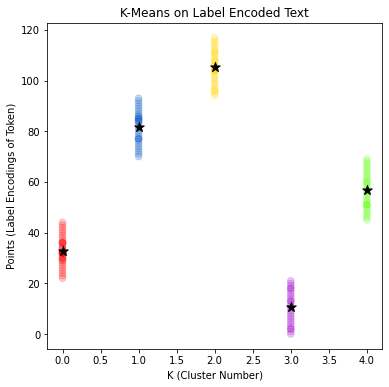

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y, [i for i in data], c=y, cmap='prism', marker='.', s=180, alpha=0.2)
plt.scatter([0,1,2,3,4], kmeans.cluster_centers_,  color='black', marker='*', s=100)
plt.xlabel('K (Cluster Number)')
plt.ylabel('Points (Label Encodings of Token)')
plt.title('K-Means on Label Encoded Text')
plt.show()

In [29]:
for i in range(len(y)):
    print("Point ",data[i], " -> Cluster ", y[i])

Point  0  -> Cluster  3
Point  32  -> Cluster  0
Point  42  -> Cluster  0
Point  35  -> Cluster  0
Point  102  -> Cluster  2
Point  38  -> Cluster  0
Point  111  -> Cluster  2
Point  34  -> Cluster  0
Point  3  -> Cluster  3
Point  74  -> Cluster  1
Point  80  -> Cluster  1
Point  82  -> Cluster  1
Point  77  -> Cluster  1
Point  18  -> Cluster  3
Point  15  -> Cluster  3
Point  98  -> Cluster  2
Point  96  -> Cluster  2
Point  64  -> Cluster  4
Point  108  -> Cluster  2
Point  41  -> Cluster  0
Point  17  -> Cluster  3
Point  97  -> Cluster  2
Point  109  -> Cluster  2
Point  112  -> Cluster  2
Point  83  -> Cluster  1
Point  73  -> Cluster  1
Point  32  -> Cluster  0
Point  36  -> Cluster  0
Point  69  -> Cluster  4
Point  61  -> Cluster  4
Point  51  -> Cluster  4
Point  48  -> Cluster  4
Point  58  -> Cluster  4
Point  32  -> Cluster  0
Point  30  -> Cluster  0
Point  96  -> Cluster  2
Point  33  -> Cluster  0
Point  7  -> Cluster  3
Point  65  -> Cluster  4
Point  27  -> Cluster  